In [1]:
import os
import PIL
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

                    ### 1 ###
while True:
    image_n_input = input("請選擇想顯示之圖片編號(1-20): ")
    try:
        n = int(image_n_input)
        if 1 <= n <= 20:
            break
        else:
            print("Out of the range")
    except ValueError:
        print("Invalid input (not integer)")

請選擇想顯示之圖片編號(1-20):  1


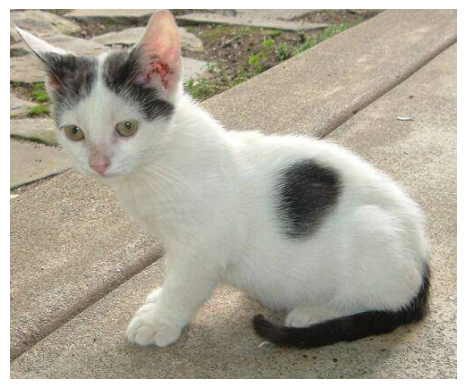

In [2]:
                    ### 2 ###
def show_image(image_path):
    if os.path.exists(image_path):
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print(f"Not found {image_path}")

picName = "pic" + str(n) + ".jpg"
image_path = os.path.join("./test/", picName)
show_image(image_path)

k =  5


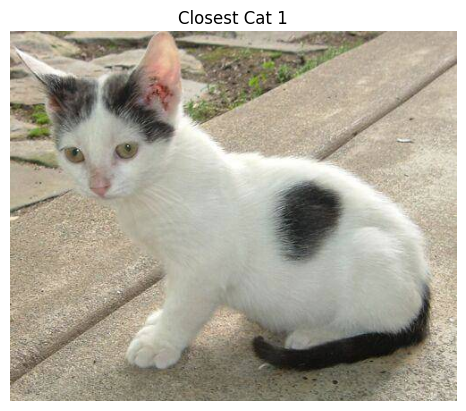

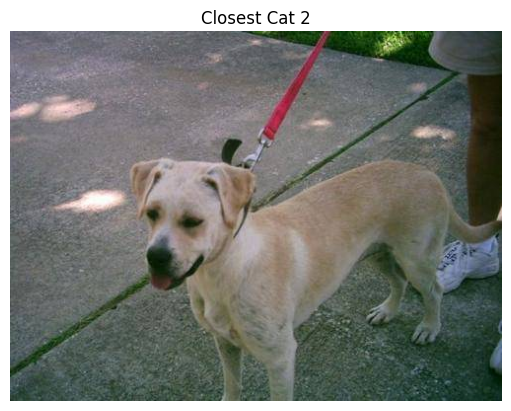

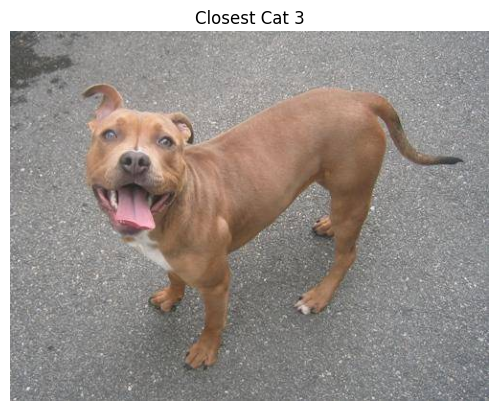

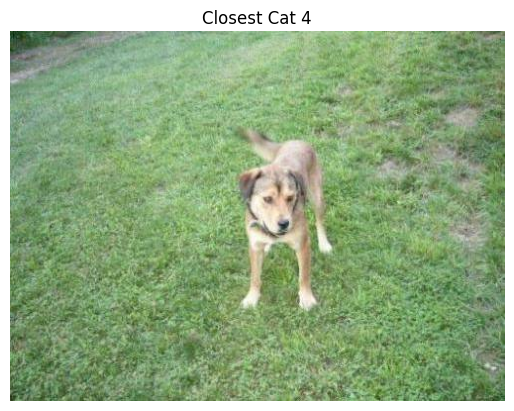

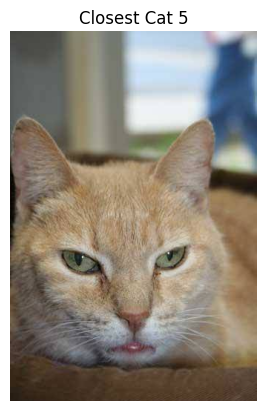

Among the 5 most similar images, there are 2 cats and 3 dogs.


In [3]:
                   ### 3 ###
while True:
    similar_k_input = input("k = ")
    try:
        k = int(similar_k_input)
        if 1 <= k <= 100:
            break
        else:
            print("input < 1  or  input > 100")
            print("Default: k = 3")
            break
    except ValueError:
        print("Invalid input (not integer)")

# Set the directories for cat and dog images
base_dir = "./reference"
cats_dir = os.path.join(base_dir, "cats")
dogs_dir = os.path.join(base_dir, "dogs")

# Load images from a directory
def load_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            filepath = os.path.join(directory, filename)
            image = plt.imread(filepath)
            images.append(image)
    return images

# Calculate the similarity between two images
def calculate_image_similarity(image1, image2):
    # Resize both images to 64x64 pixels
    image1 = cv2.resize(image1, (64, 64))
    image2 = cv2.resize(image2, (64, 64))
    
    # Calculate the absolute difference between the two images
    diff = np.abs(image1 - image2)
    
    # Calculate the similarity score
    score = np.sum(diff) / (64 * 64 * 3)  # 3 channels for RGB
    return score

# Find the k closest images
def find_closest_images(query_image, images, k=3):
    similarities = []
    for image in images:
        similarity = calculate_image_similarity(query_image, image)
        similarities.append(similarity)
    
    # Find the indices of the k most similar images
    closest_indices = np.argsort(similarities)[:k]
    
    # Return the k closest images
    closest_images = [images[i] for i in closest_indices]
    return closest_indices, closest_images

# Load the query image
query_image = plt.imread(image_path)

# Load cat and dog images
cat_images = load_images_from_dir(cats_dir)
dog_images = load_images_from_dir(dogs_dir)

# Combine cat and dog images into one list
all_images = cat_images + dog_images

# Find the k closest images from all_images
closest_indices, closest_images = find_closest_images(query_image, all_images, k)

# Determine how many of the k similar images are cats or dogs
num_cats = len([i for i in closest_indices if i < len(cat_images)])
num_dogs = len([i for i in closest_indices if i >= len(cat_images)])

# Display the results
for i, image in enumerate(closest_images):
    label = "Cat" if i < len(cat_images) else "Dog"
    plt.imshow(image)
    plt.title(f"Closest {label} {i+1}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

print(f"Among the {k} most similar images, there are {num_cats} cats and {num_dogs} dogs.")

In [4]:
                    ### 4 ###
print("Therefore:")
if num_cats > num_dogs:
    print(f"{picName} is a picture of a cat.")
else:
    print(f"{picName} is a picture of a dog.")

Therefore:
pic1.jpg is a picture of a dog.


# 討論：
### 1) 此方法僅比較RGB值的差異，所以只可以找出兩張圖片的顏色差異程度，無法精準的判斷貓狗，如果兩張圖片整體上的顏色差異不大，例如：背景相同，貓狗的面積又不大，就會被認定為相似度高。就會被認定為相似度高。
### 2) 因在計算差異時，是直接取絕對值看大小，所以無發分辨比較圖片和所選圖片的顏色差異，RGB差值+/-會被視為一樣的圖片，例如：深紅色和白色和粉紅色比較時，會被視為一樣的差異。